In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df = pd.read_csv(r"D:\Ganesh\ML_AI\DecisionTree\SVM\raw_data\Cancer\cancer_data.csv")

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [8]:
df["diagnosis"] = df["diagnosis"].replace('B',0)
df["diagnosis"] = df["diagnosis"].replace('M',1)

In [9]:
X = df.drop("diagnosis",axis=1)
Y = df["diagnosis"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
lcl = svm.SVC(kernel="linear")
lcl.fit(X_train,y_train)

SVC(kernel='linear')

In [13]:
y_pred = lcl.predict(X_test)

In [14]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [15]:
nX = df[["radius_mean","concave points_mean"]]
nY = df["diagnosis"]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(nX,nY,test_size=0.2)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
lcl2 = svm.SVC(kernel="linear")
lcl2.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred = lcl2.predict(X_test)

In [20]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9210526315789473


In [21]:
sc_x = scaler.fit_transform(df['radius_mean'].values.reshape(-1,1))
sc_y = scaler.fit_transform(df['concave points_mean'].values.reshape(-1,1))
xmin = np.min(sc_x)
xmax = np.max(sc_x)
ymin = np.min(sc_y)
ymax = np.max(sc_y)
h=0.01
print(xmin,xmax,ymin,ymax)
xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
xx_row = xx.ravel()
yy_row = yy.ravel()

-2.0296483039857525 3.9712876465451097 -1.2618195840825894 3.9279296603616616


In [22]:
zz_row=lcl2.predict(np.c_[xx_row,yy_row])

c:\Users\TEST\anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


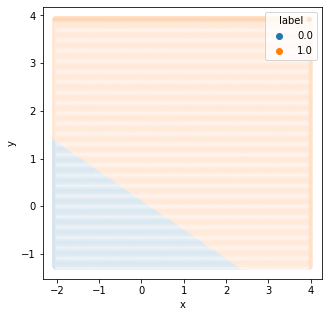

In [23]:
tmp_df=pd.DataFrame(np.c_[xx_row,yy_row,zz_row],columns=['x','y','label'])
plt.figure(figsize=[5,5])
sns.scatterplot(data=tmp_df,x='x',y='y',hue='label')
plt.show()
plt.close()  

In [24]:
attri = scaler.fit_transform(np.array(df[["radius_mean","concave points_mean"]]))
label = df["diagnosis"].values
num_labels = np.unique(label).shape[0]
num_rec = attri.shape[0]
num_attri = attri.shape[1]
print(num_labels,num_attri,num_rec)

2 2 569


In [25]:
def LossFunction(data,label,weights,delta):
    num_rec = data.shape[0]
    scores = weights @ data.T 
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = np.sum(margins)/num_rec
    return loss 
    

In [26]:
weights = np.random.random([num_labels,num_attri])
print(LossFunction(attri,label,weights=weights,delta=1))

0.9021845324254683


In [27]:
def LossFunctionGradRegularization(data,label,weights,delta,eps=1E-3,lam=0.1):
    
    num_rec = data.shape[0]
    scores = weights @ data.T 
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = (np.sum(margins)/num_rec)
    regularization = (lam*(np.sum(weights**2)))
    
    num_pixels = weights.shape[1]  
    num_classes = weights.shape[0]
  
    gradient = np.zeros(weights.shape)
    for jind in range(num_pixels): 
        pert = eps*data.T[jind,:]
        for iind in range(num_classes):    
            newScores = scores.copy()
            newScores[iind,:] = scores[iind,:]+pert
            newmargins = np.maximum(0,newScores-newScores[label,np.arange(num_rec)]+delta)
            newmargins[label,np.arange(num_rec)]=0
            newloss = np.sum(newmargins)/num_rec
            gradient[iind,jind]=((newloss - loss)/eps)
    gradient = gradient + (2*lam*weights)
    loss = loss + regularization
    
    return loss,gradient

In [28]:
weights = np.random.random([num_labels,num_attri])
print(weights)
num_steps = 10000
learning_rate = 0.1
records = []
for iind in range(num_steps):
    selected_data = np.random.randint(0,num_rec,100)
    loss,gradient=LossFunctionGradRegularization(attri[selected_data,:],label[selected_data],weights,1)
    old_weights = weights.copy()
    
    grad_mag = np.linalg.norm(gradient)
    
    if(iind%1000 == 0):
        learning_rate = learning_rate*0.5
    
    weights = weights-learning_rate*gradient/grad_mag
    
    records.append([iind+1,loss,learning_rate,grad_mag])

    print(f'Step - {iind+1}, Loss - {loss}, Learning Rate - {learning_rate}, magnitude of gradient - {grad_mag}')
    
    if(grad_mag <1E-6):
        break

[[0.56269406 0.7752444 ]
 [0.44754108 0.41806663]]
Step - 1, Loss - 1.4465320877714443, Learning Rate - 0.05, magnitude of gradient - 1.3755426502327288
Step - 2, Loss - 1.4280221855745028, Learning Rate - 0.05, magnitude of gradient - 1.6152962189340854
Step - 3, Loss - 1.3319913961227317, Learning Rate - 0.05, magnitude of gradient - 1.556424653883509
Step - 4, Loss - 1.2370890786307285, Learning Rate - 0.05, magnitude of gradient - 1.3424904150839017
Step - 5, Loss - 1.1808101117379137, Learning Rate - 0.05, magnitude of gradient - 1.4680730468624055
Step - 6, Loss - 1.1003119612046668, Learning Rate - 0.05, magnitude of gradient - 1.528608807616501
Step - 7, Loss - 1.03682245777288, Learning Rate - 0.05, magnitude of gradient - 1.507952040905708
Step - 8, Loss - 0.9555253533387635, Learning Rate - 0.05, magnitude of gradient - 1.443496365810142
Step - 9, Loss - 0.8992030062413479, Learning Rate - 0.05, magnitude of gradient - 1.3261947891198835
Step - 10, Loss - 0.8282578885595487,

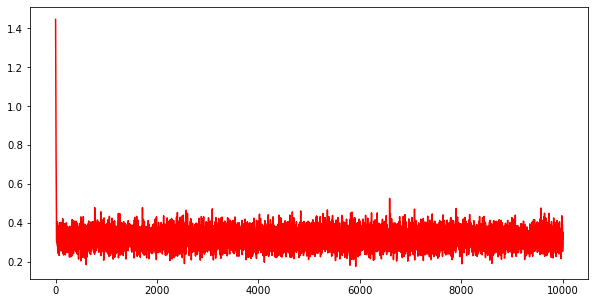

In [29]:
dff=pd.DataFrame.from_records(records,columns=['Step','Loss','Learning Rate','Gradient_Magnitude'])
fig = plt.figure(figsize=[10,5])
fig.patch.set_facecolor(color="white")
plt.plot(dff['Step'],dff['Loss'],'-r')

In [30]:
def prediction(weights,attri,num_rec):
    p_score = weights @ attri.T
    pred_score = []
    for i in range(num_rec):
        sep = list(p_score[:,i])
        max_val = max(p_score[:,i])
        pred_score.append(sep.index(max_val)+1)
    pred_score = np.array(pred_score)
    return np.array(pred_score)

In [31]:
x_val = []
y_val = []
for ele in sc_x:
    x_val.append(float(ele))
for ele in sc_y:
    y_val.append(float(ele))

In [32]:
newdf = pd.DataFrame({'x':x_val,'y':y_val,'label':df['diagnosis']})

In [33]:
newdf.head()

,x,y,label
0,1.097064,2.532475,1
1,1.829821,0.548144,1
2,1.579888,2.037231,1
3,-0.768909,1.451707,1
4,1.750297,1.428493,1


In [34]:
newdf["label"] = newdf["label"].replace('B',0)
newdf["label"] = newdf["label"].replace('M',1)

<ipython-input-35-e6e337c5fbc2>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


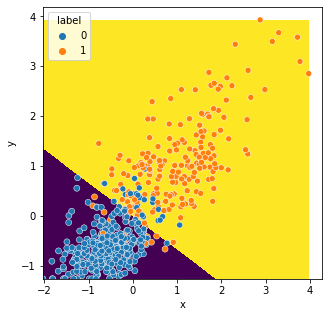

In [35]:
dg = pd.DataFrame({'x':xx_row,'y':yy_row})
zz_row=prediction(weights,np.array(dg[['x','y']]),len(dg['x']))
zz=zz_row.reshape(xx.shape)
plt.figure(figsize=[5,5])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=newdf,x='x',y='y',hue='label')
plt.show()
plt.close()